In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import mpld3
import numpy as np

In [110]:
data = pd.read_csv("data.csv")
df = pd.DataFrame(data)

In [111]:
df.shape

(27075, 18)

In [112]:
df.head()

,Index,id,name,release_date,english,developer,publisher,platforms,required_age,steamspy_tags,positive_ratings,negative_ratings,average_playtime,median_playtime,price,detailed_description,about_the_game,short_description
0,0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Action;FPS;Multiplayer,124534,3339,17612,317,7.19,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...
1,1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Action;FPS;Multiplayer,3318,633,277,62,3.99,One of the most popular online action games of...,One of the most popular online action games of...,One of the most popular online action games of...
2,2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,FPS;World War II;Multiplayer,3416,398,187,34,3.99,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...
3,3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Action;FPS;Multiplayer,1273,267,258,184,3.99,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...
4,4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,FPS;Action;Sci-fi,5250,288,624,415,3.99,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...


In [113]:
name = df["name"]
positive = df["positive_ratings"]
negative = df["negative_ratings"]

In [160]:
date = df["release_date"]
date.sort_values(ascending=True)

2685     1997-06-30
6        1998-11-08
1        1999-04-01
4        1999-11-01
0        2000-11-01
5        2000-11-01
988      2001-03-15
3        2001-06-01
8        2001-06-01
1185     2001-12-01
778      2002-08-28
2        2003-05-01
1186     2003-07-01
2143     2003-11-01
7        2004-03-01
331      2004-03-17
11       2004-06-01
10       2004-11-01
13       2004-11-01
9        2004-11-16
1187     2005-04-01
117      2005-07-11
30       2005-07-14
743      2005-08-16
26       2005-10-12
14       2005-10-27
35       2006-02-07
34       2006-02-07
27       2006-03-14
42       2006-04-01
            ...    
27070    2019-04-24
26461    2019-04-24
27066    2019-04-24
27065    2019-04-24
25903    2019-04-24
25827    2019-04-24
26884    2019-04-24
26610    2019-04-24
27055    2019-04-24
27074    2019-04-24
27035    2019-04-24
6731     2019-04-24
26905    2019-04-24
24139    2019-04-24
20644    2019-04-24
26491    2019-04-24
27053    2019-04-24
27043    2019-04-24
25704    2019-04-24


## NB DE JEUX PAR DEV SUR LES X ANNÉES

In [149]:
df_developers = df['developer'].value_counts()

In [151]:
df_developers = pd.DataFrame(df_developers, dtype="str")

In [152]:
df_developers = pd.DataFrame(df_developers["developer"].str.split(' ',1).tolist())

In [130]:
df_number_devs = pd.concat([name, df_developers], axis=1)
df_number_devs.columns = ["devs", "number"]
nb_jeux = df_number_devs["number"].value_counts()

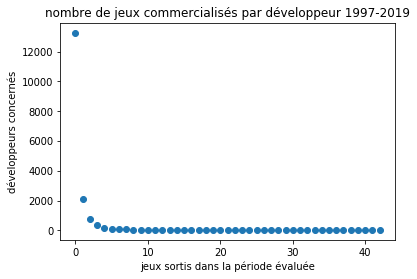

In [161]:
plt.figure()

plt.scatter(x=np.arange(0,43,1), y=nb_jeux)
#plt.xlim(0,16)
plt.xlabel("jeux sortis dans la période évaluée")
plt.ylabel("développeurs concernés")

plt.title("nombre de jeux commercialisés par développeur 1997-2019")

plt.show()

# Compatibilité des plateformes

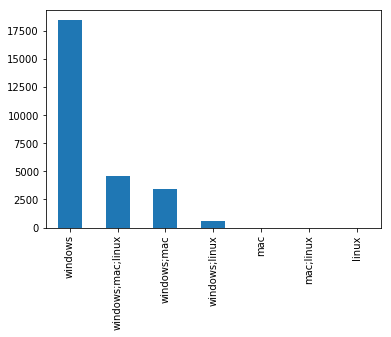

In [155]:
plt.figure()
df["platforms"].value_counts().plot("bar")
plt.show()

# Plus gros dev vs plus gros distributeurs

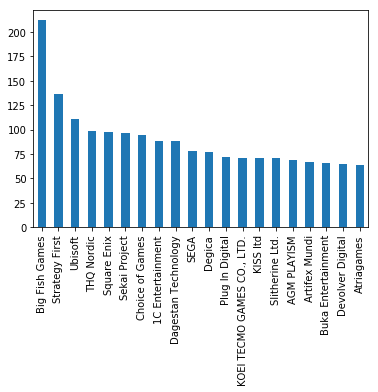

In [166]:
df["publisher"].value_counts()[:20].plot("bar")

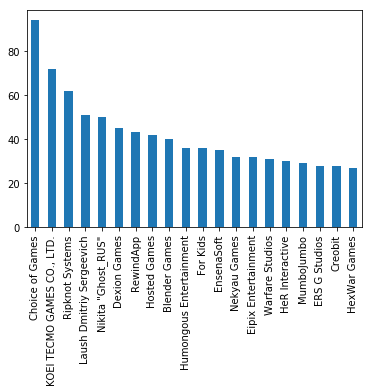

In [167]:
df["developer"].value_counts()[:20].plot("bar")

In [173]:
df_commun = df[df.developer==df.publisher]
df_commun.shape

(17592, 18)

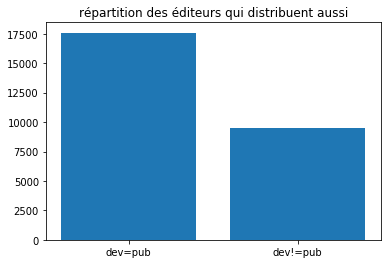

In [183]:
plt.figure()

x=[0,1]
plt.bar([0,1],[17592, 9483])
plt.xticks(x, ("dev=pub", "dev!=pub"))
plt.title("répartition des éditeurs qui distribuent aussi")
plt.show()

# Répartition des évaluations

In [ ]:
#trop gros? je n'arrive pas à le faire marcher

plt.figure()

p1 = plt.bar(name, positive)
p2 = plt.bar(name, negative, bottom=positive)

plt.ylabel('Evaluations')
plt.title('Evaluations positives et negatives par jeu')
plt.xticks(name)
plt.legend((p1[0], p2[0]), ('Positive', 'Negative'))

plt.show()

KeyboardInterrupt: 